<img src="./media/Logo Element-01.jpg" align="center"><h1 align="center">Deep Learning for NLP with Pytorch</h1>

http://pytorch.org/tutorials/beginner/deep_learning_nlp_tutorial.html#sphx-glr-beginner-deep-learning-nlp-tutorial-py

In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

<h1>1. Introduction to Torch’s tensor library</h1>

In [2]:
# Create a torch.Tensor object with the given data.  It is a 1D vector
V_data = [1., 2., 3.]
V = torch.Tensor(V_data)
print(V)

# Creates a matrix
M_data = [[1., 2., 3.], [4., 5., 6]]
M = torch.Tensor(M_data)
print(M)

# Create a 3D tensor of size 2x2x2.
T_data = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
T = torch.Tensor(T_data)
print(T)


 1
 2
 3
[torch.FloatTensor of size 3]


 1  2  3
 4  5  6
[torch.FloatTensor of size 2x3]


(0 ,.,.) = 
  1  2
  3  4

(1 ,.,.) = 
  5  6
  7  8
[torch.FloatTensor of size 2x2x2]



In [3]:
# Index into V and get a scalar
print(V[0])

# Index into M and get a vector
print(M[0])

# Index into T and get a matrix
print(T[0])

1.0

 1
 2
 3
[torch.FloatTensor of size 3]


 1  2
 3  4
[torch.FloatTensor of size 2x2]



In [4]:
x = torch.randn((3, 4, 5))
print(x)


(0 ,.,.) = 
 -2.9718  1.7070 -0.4305 -2.2820  0.5237
  0.0004 -1.2039  3.5283  0.4434  0.5848
  0.8407  0.5510  0.3863  0.9124 -0.8410
  1.2282 -1.8661  1.4146 -1.8781 -0.4674

(1 ,.,.) = 
 -0.7576  0.4215 -0.4827 -1.1198  0.3056
  1.0386  0.5206 -0.5006  1.2182  0.2117
 -1.0613 -1.9441 -0.9596  0.5489 -0.9901
 -0.3826  1.5037  1.8267  0.5561  1.6445

(2 ,.,.) = 
  0.4973 -1.5067  1.7661 -0.3569 -0.1713
  0.4068 -0.4284 -1.1299  1.4274 -1.4027
  1.4825 -1.1559  1.6190  0.9581  0.7747
  0.1940  0.1687  0.3061  1.0743 -1.0327
[torch.FloatTensor of size 3x4x5]



In [5]:
x = torch.Tensor([1., 2., 3.])
y = torch.Tensor([4., 5., 6.])
z = x + y
print(z)


 5
 7
 9
[torch.FloatTensor of size 3]



In [6]:
# By default, it concatenates along the first axis (concatenates rows)
x_1 = torch.randn(2, 5)
y_1 = torch.randn(3, 5)
z_1 = torch.cat([x_1, y_1])
print(z_1)

# Concatenate columns:
x_2 = torch.randn(2, 3)
y_2 = torch.randn(2, 5)
# second arg specifies which axis to concat along
z_2 = torch.cat([x_2, y_2], 1)
print(z_2)

# If your tensors are not compatible, torch will complain.  Uncomment to see the error
# torch.cat([x_1, x_2])


 1.0930  0.7769 -1.3128  0.7099  0.9944
-0.2694 -0.6491 -0.1373 -0.2954 -0.7725
-0.2215  0.5074 -0.6794 -1.6115  0.5230
-0.8890  0.2620  0.0302  0.0013 -1.3987
 1.4666 -0.1028 -0.0097 -0.8420 -0.2067
[torch.FloatTensor of size 5x5]


 1.0672  0.1732 -0.6873  0.3620  0.3776 -0.2443 -0.5850  2.0812
 0.3111  0.2358 -1.0658 -0.1186  0.4903  0.8349  0.8894  0.4148
[torch.FloatTensor of size 2x8]



In [7]:
x = torch.randn(2, 3, 4)
print(x)
print(x.view(2, 12))  # Reshape to 2 rows, 12 columns
# Same as above.  If one of the dimensions is -1, its size can be inferred
print(x.view(2, -1))


(0 ,.,.) = 
  0.0507 -0.9644 -2.0111  0.5245
  2.1332 -0.0822  0.8388 -1.3233
  0.0701  1.2200  0.4251 -1.2328

(1 ,.,.) = 
 -0.6195  1.5133  1.9954 -0.6585
 -0.4139 -0.2250 -0.6890  0.9882
  0.7404 -2.0990  1.2582 -0.3990
[torch.FloatTensor of size 2x3x4]



Columns 0 to 9 
 0.0507 -0.9644 -2.0111  0.5245  2.1332 -0.0822  0.8388 -1.3233  0.0701  1.2200
-0.6195  1.5133  1.9954 -0.6585 -0.4139 -0.2250 -0.6890  0.9882  0.7404 -2.0990

Columns 10 to 11 
 0.4251 -1.2328
 1.2582 -0.3990
[torch.FloatTensor of size 2x12]



Columns 0 to 9 
 0.0507 -0.9644 -2.0111  0.5245  2.1332 -0.0822  0.8388 -1.3233  0.0701  1.2200
-0.6195  1.5133  1.9954 -0.6585 -0.4139 -0.2250 -0.6890  0.9882  0.7404 -2.0990

Columns 10 to 11 
 0.4251 -1.2328
 1.2582 -0.3990
[torch.FloatTensor of size 2x12]



<h1>2. Computation Graphs and Automatic Differentiation</h1>

In [8]:
# Variables wrap tensor objects
x = autograd.Variable(torch.Tensor([1., 2., 3]), requires_grad=True)
# You can access the data with the .data attribute
print(x.data)

# You can also do all the same operations you did with tensors with Variables.
y = autograd.Variable(torch.Tensor([4., 5., 6]), requires_grad=True)
z = x + y
print(z.data)


 1
 2
 3
[torch.FloatTensor of size 3]


 5
 7
 9
[torch.FloatTensor of size 3]



<h2>The Variable class keeps track of how it was created.</h2>

In [9]:
# z knows something extra.
print(z.creator)

In [10]:
# Lets sum up all the entries in z
s = z.sum()
print(s)
print(s.creator)

Variable containing:
 21
[torch.FloatTensor of size 1]



<h2>What is the derivative of this sum with respect to the first component of x?</h2>

$$\frac{\partial s}{\partial x_0}$$

$$s = \overbrace{x_0 + y_0}^\text{$z_0$} + \overbrace{x_1 + y_1}^\text{$z_1$} + \overbrace{x_2 + y_2}^\text{$z_2$}$$

In [11]:
# calling .backward() on any variable will run backprop, starting from it.
s.backward()
print(x.grad)

Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]



<h2>Breaking the computation graph</h2>

In [12]:
x = torch.randn((2, 2))
y = torch.randn((2, 2))
z = x + y  # These are Tensor types, and backprop would not be possible

var_x = autograd.Variable(x)
var_y = autograd.Variable(y)
# var_z contains enough information to compute gradients, as we saw above
var_z = var_x + var_y
print(var_z.creator)

var_z_data = var_z.data  # Get the wrapped Tensor object out of var_z...
# Re-wrap the tensor in a new variable
new_var_z = autograd.Variable(var_z_data)

# ... does new_var_z have information to backprop to x and y?
# NO!
print(new_var_z.creator)
# And how could it?  We yanked the tensor out of var_z (that is
# what var_z.data is).  This tensor doesn't know anything about
# how it was computed.  We pass it into new_var_z, and this is all the
# information new_var_z gets.  If var_z_data doesn't know how it was
# computed, theres no way new_var_z will.
# In essence, we have broken the variable away from its past history

None


<h1>3. Deep Learning Building Blocks: Affine maps, non-linearities and objectives</h1>

In [17]:
lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = autograd.Variable(torch.randn(2, 5))
print(data)
print(lin(data))  # yes

Variable containing:
-0.1754  0.1697  1.5807  0.4838 -1.2901
-0.8039  0.6835  1.0926 -1.2625 -0.0191
[torch.FloatTensor of size 2x5]

Variable containing:
 1.1640 -0.3440  0.3103
 1.1189 -0.1717 -0.3588
[torch.FloatTensor of size 2x3]



<h2>Non-Linearities</h2>

e.g. $$f(x) = max(0,x)$$

In [18]:
# In pytorch, most non-linearities are in torch.functional (we have it imported as F)
# Note that non-linearites typically don't have parameters like affine maps do.
# That is, they don't have weights that are updated during training.
data = autograd.Variable(torch.randn(2, 2))
print(data)
print(F.relu(data))

Variable containing:
-1.0565 -0.9923
-0.3660  0.6203
[torch.FloatTensor of size 2x2]

Variable containing:
 0.0000  0.0000
 0.0000  0.6203
[torch.FloatTensor of size 2x2]



<h2>Softmax and Probabilities</h2>

Let **x** be a vector of real numbers (positive, negative, whatever, there are no constraints). Then the i’th component of **Softmax(x)** is 

$$\frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [19]:
# Softmax is also in torch.functional
data = autograd.Variable(torch.randn(5))
print(data)
print(F.softmax(data))
print(F.softmax(data).sum())  # Sums to 1 because it is a distribution!
print(F.log_softmax(data))  # theres also log_softmax

Variable containing:
 0.7167
 0.5366
 0.2121
 1.7014
 1.6250
[torch.FloatTensor of size 5]

Variable containing:
 0.1317
 0.1099
 0.0795
 0.3524
 0.3265
[torch.FloatTensor of size 5]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
-2.0276
-2.2077
-2.5322
-1.0429
-1.1194
[torch.FloatTensor of size 5]



<h2>Objective Functions</h2>

<img src="./media/nn.jpeg">

<h1>4. Optimization and Training</h1>

$$\theta^{(t+1)} = \theta^{(t)} - \eta \nabla_\theta L(\theta)$$

In [40]:
f = lambda x: x**3-2*x**2+2

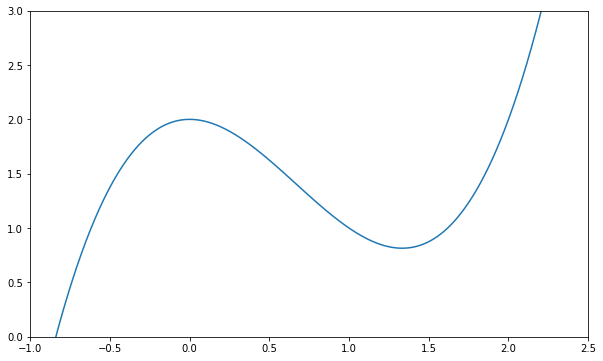

In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.linspace(-1,2.5,1000)
plt.figure(figsize=(10, 6))
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

In [42]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3334253508453249
Number of steps: 17


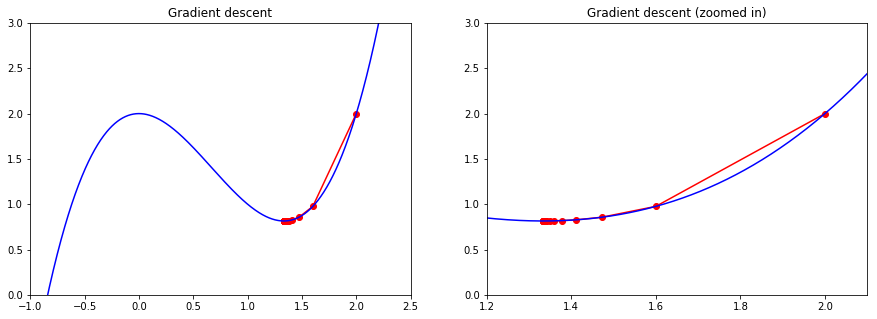

In [46]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

<h2>Stochastic Gradient Descent</h2>

In [28]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

$$y = 2x+17+\epsilon$$

In [32]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = list(range(len(x)))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

In [33]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

In [35]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Local minimum occurs where:
theta_0 = 16.9495470013
theta_1 = 2.03582595648


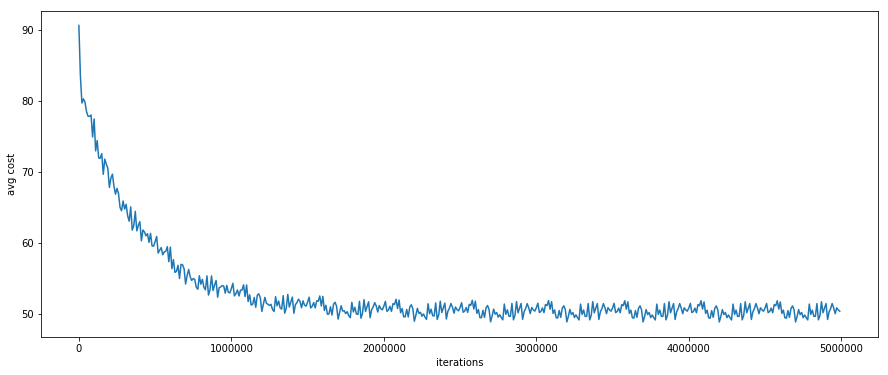

In [47]:
iterations = np.arange(len(cost_list))*10000
plt.figure(figsize=(15, 6))
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

<h1>5. Creating Network Components in Pytorch</h1>

In [48]:
data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]

In [49]:
# word_to_ix maps each word in the vocab to a unique integer, which will be its
# index into the Bag of words vector
word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}


In [50]:
class BoWClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, vocab_size):
        # calls the init function of nn.Module.  Dont get confused by syntax,
        # just always do it in an nn.Module
        super(BoWClassifier, self).__init__()

        # Define the parameters that you will need.  In this case, we need A and b,
        # the parameters of the affine mapping.
        # Torch defines nn.Linear(), which provides the affine map.
        # Make sure you understand why the input dimension is vocab_size
        # and the output is num_labels!
        self.linear = nn.Linear(vocab_size, num_labels)

        # NOTE! The non-linearity log softmax does not have parameters! So we don't need
        # to worry about that here

    def forward(self, bow_vec):
        # Pass the input through the linear layer,
        # then pass that through log_softmax.
        # Many non-linearities and other functions are in torch.nn.functional
        return F.log_softmax(self.linear(bow_vec))

In [51]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)

In [52]:
def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

In [53]:
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

# the model knows its parameters.  The first output below is A, the second is b.
# Whenever you assign a component to a class variable in the __init__ function
# of a module, which was done with the line
# self.linear = nn.Linear(...)
# Then through some Python magic from the Pytorch devs, your module
#(in this case, BoWClassifier) will store knowledge of the nn.Linear's parameters
for param in model.parameters():
    print(param)

Parameter containing:

Columns 0 to 9 
-0.1786  0.1633 -0.1540  0.1106 -0.1076  0.0456  0.0835 -0.1820  0.0234  0.0605
 0.0319 -0.0505  0.1844 -0.1765  0.1360  0.0945 -0.1020 -0.0790 -0.0024 -0.1160

Columns 10 to 19 
-0.1912 -0.1452 -0.1679 -0.0807  0.1833 -0.0546  0.0267 -0.0884 -0.1164 -0.1671
 0.0471  0.1890  0.1290  0.1542 -0.1346  0.1017 -0.1888  0.0593 -0.1687 -0.1806

Columns 20 to 25 
-0.0971 -0.1364  0.0956 -0.1327 -0.1195  0.1721
-0.0054  0.1231  0.0417  0.1030  0.0270 -0.0175
[torch.FloatTensor of size 2x26]

Parameter containing:
1.00000e-02 *
 -7.1636
  1.2483
[torch.FloatTensor of size 2]



In [54]:
# To run the model, pass in a BoW vector, but wrapped in an autograd.Variable
sample = data[0]
bow_vector = make_bow_vector(sample[0], word_to_ix)
log_probs = model(autograd.Variable(bow_vector))
print(log_probs)

Variable containing:
-0.9278 -0.5032
[torch.FloatTensor of size 1x2]



In [55]:
label_to_ix = {"SPANISH": 0, "ENGLISH": 1}

In [56]:
# Run on test data before we train, just to see a before-and-after
for instance, label in test_data:
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    print(log_probs)

Variable containing:
-1.3417 -0.3030
[torch.FloatTensor of size 1x2]

Variable containing:
-0.8271 -0.5750
[torch.FloatTensor of size 1x2]



In [57]:
# Print the matrix column corresponding to "creo"
print(next(model.parameters())[:, word_to_ix["creo"]])

Variable containing:
-0.1912
 0.0471
[torch.FloatTensor of size 2]



In [58]:
loss_function = nn.NLLLoss() # negative log likelihood loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [59]:
# Usually you want to pass over the training data several times.
# 100 is much bigger than on a real data set, but real datasets have more than
# two instances.  Usually, somewhere between 5 and 30 epochs is reasonable.
for epoch in range(100):
    for instance, label in data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Variable as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
        target = autograd.Variable(make_target(label, label_to_ix))

        # Step 3. Run our forward pass.
        log_probs = model(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()

In [60]:
for instance, label in test_data:
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    print(log_probs)

Variable containing:
-0.2633 -1.4631
[torch.FloatTensor of size 1x2]

Variable containing:
-2.7097 -0.0689
[torch.FloatTensor of size 1x2]



In [61]:
# Index corresponding to Spanish goes up, English goes down!
print(next(model.parameters())[:, word_to_ix["creo"]])

Variable containing:
 0.2874
-0.4315
[torch.FloatTensor of size 2]



<h2 align="center">This model is just logistic regression.</h2>

<h1>6. Word Embeddings: Encoding Lexical Semantics</h1>

<img src="./media/word2vec-distributed-representation.png">

In [64]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.LongTensor([word_to_ix["hello"]])
hello_embed = embeds(autograd.Variable(lookup_tensor))
print(hello_embed)

Variable containing:
 0.1109  0.4339  0.0103 -0.5949  0.8580
[torch.FloatTensor of size 1x5]



<h2>Getting Dense Word Embeddings</h2>

Suppose we are building a language model. Suppose we have seen the sentences  
* The mathematician ran to the store.
* The physicist ran to the store.
* The mathematician solved the open problem.

Now suppose we get a new sentence never before seen in our training data:  

* The physicist solved the open problem.

How could we actually encode semantic similarity in words? 

$$q_\text{mathematician} = \left[ \overbrace{2.3}^\text{can run},
\overbrace{9.4}^\text{likes coffee}, \overbrace{-5.5}^\text{majored in Physics}, \dots \right]$$

$$q_\text{physicist} = \left[ \overbrace{2.5}^\text{can run},
\overbrace{9.1}^\text{likes coffee}, \overbrace{6.4}^\text{majored in Physics}, \dots \right]$$

$$\text{Similarity}(\text{physicist}, \text{mathematician}) = q_\text{physicist} \cdot q_\text{mathematician}$$

$$\text{Similarity}(\text{physicist}, \text{mathematician}) = \frac{q_\text{physicist} \cdot q_\text{mathematician}}
{\| q_\text{\physicist} \| \| q_\text{mathematician} \|} = \cos (\phi)$$

<h3>Where ϕ is the angle between the two vectors. That way, extremely similar words (words whose embeddings point in the same direction) will have similarity 1. Extremely dissimilar words should have similarity -1.</h3>

<h2>N-Gram Language Modeling</h2>

In an n-gram language model, given a sequence of words ww, we want to compute  
$$P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1} )$$

<img src="./media/Sonnet_2_1609.jpg">

In [67]:
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

In [68]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10

# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


In [70]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs

In [71]:
losses = []
loss_function = nn.NLLLoss() # negative log likelihood loss
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [72]:
for epoch in range(10):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = autograd.Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients.  Before passing in a new instance,
        # you need to zero out the gradients from the old instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, autograd.Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)

In [73]:
print(losses)  # The loss decreased every iteration over the training data!

[
 521.1460
[torch.FloatTensor of size 1]
, 
 518.6828
[torch.FloatTensor of size 1]
, 
 516.2376
[torch.FloatTensor of size 1]
, 
 513.8092
[torch.FloatTensor of size 1]
, 
 511.3959
[torch.FloatTensor of size 1]
, 
 508.9974
[torch.FloatTensor of size 1]
, 
 506.6142
[torch.FloatTensor of size 1]
, 
 504.2448
[torch.FloatTensor of size 1]
, 
 501.8882
[torch.FloatTensor of size 1]
, 
 499.5425
[torch.FloatTensor of size 1]
]


<h2>Exercise: Computing Word Embeddings: Continuous Bag-of-Words</h2>

<img src="./media/word2vec-cbow.png">

<h2>CBOW tries to minimize</h2>

$$-\log p(w_i | C) = \log \text{Softmax}(A(\sum_{w \in C} q_w) + b)$$

In [74]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right

In [75]:
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

In [76]:
word_to_ix = {word: i for i, word in enumerate(raw_text)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


In [77]:
class CBOW(nn.Module):

    def __init__(self):
        pass

    def forward(self, inputs):
        pass

In [78]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return autograd.Variable(tensor)

make_context_vector(data[0][0], word_to_ix)  # example

Variable containing:
  0
 13
 47
  4
[torch.LongTensor of size 4]

<h1>7. Sequence Models and Long-Short Term Memory Networks</h1>

<h2 align="center">Recurrent Neural Networks</h2>

<img src="./media/RNN-rolled.png">

<img src="./media/RNN-unrolled.png">

<h2>LSTM Networks</h2>

<img src="./media/LSTM3-SimpleRNN.png"><h3 align="center">The repeating module in a standard RNN contains a single layer.</h3>

<img src="./media/LSTM3-chain.png"><h3 align="center">The repeating module in an LSTM contains four interacting layers.</h3>

<h2>hyperbolic tangent function (tanh)</h2>

<h3>Another special case of a sigmoid function, it can be interpreted as a rescaled version of the logistic function.</h3>
<img src="./media/tanh.svg">

In [128]:
def tanh(z):
    e_p = np.exp(z) 
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

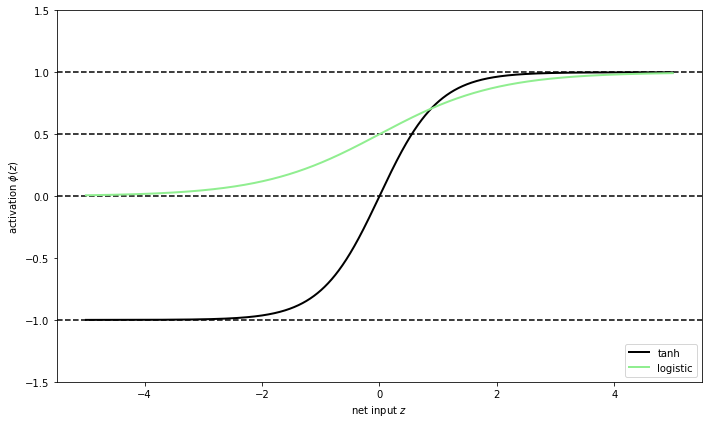

In [129]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.figure(figsize=(10, 6))
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')

plt.plot(z, tanh_act, 
         linewidth=2, 
         color='black', 
         label='tanh')
plt.plot(z, log_act, 
         linewidth=2, 
         color='lightgreen', 
         label='logistic')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

<h2>The Cell State</h2>

<img src="./media/LSTM3-C-line.png">

<h3>Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.</h3>

<img src="./media/LSTM3-gate.png">

<h3>An LSTM has three of these gates, to protect and control the cell state.</h3>

<h2>Step-by-Step LSTM Walk Through</h2>

<img src="./media/LSTM3-focus-f.png">

<h3>forget gate layer</h3>

<img src="./media/LSTM3-focus-i.png">

<h3>input gate layer</h3>

<img src="./media/LSTM3-focus-C.png">

<h3>output gate layer</h3>

<img src="./media/LSTM3-focus-o.png">

In [83]:
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [autograd.Variable(torch.randn((1, 3)))
          for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (autograd.Variable(torch.randn(1, 1, 3)),
          autograd.Variable(torch.randn((1, 1, 3))))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropogate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (autograd.Variable(torch.randn(1, 1, 3)), autograd.Variable(
    torch.randn((1, 1, 3))))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

Variable containing:
(0 ,.,.) = 
 -0.2652  0.1820 -0.3766

(1 ,.,.) = 
 -0.3918  0.2403 -0.2465

(2 ,.,.) = 
 -0.2236  0.0839 -0.3817

(3 ,.,.) = 
 -0.3156  0.0832 -0.0965

(4 ,.,.) = 
 -0.2195  0.1132 -0.1983
[torch.FloatTensor of size 5x1x3]

(Variable containing:
(0 ,.,.) = 
 -0.2195  0.1132 -0.1983
[torch.FloatTensor of size 1x1x3]
, Variable containing:
(0 ,.,.) = 
 -0.6154  0.2137 -0.3618
[torch.FloatTensor of size 1x1x3]
)


<h2>Example: An LSTM for Part-of-Speech Tagging</h2>

In [84]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    tensor = torch.LongTensor(idxs)
    return autograd.Variable(tensor)

training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


In [85]:
# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

In [86]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (autograd.Variable(torch.zeros(1, 1, self.hidden_dim)),
                autograd.Variable(torch.zeros(1, 1, self.hidden_dim)))

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, self.hidden = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space)
        return tag_scores

In [87]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss() # negative log likelihood loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [88]:
# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
inputs = prepare_sequence(training_data[0][0], word_to_ix)
tag_scores = model(inputs)
print(tag_scores)

Variable containing:
-1.3368 -1.3058 -0.7628
-1.2130 -1.3404 -0.8188
-1.2504 -1.2859 -0.8273
-1.2092 -1.3411 -0.8209
-1.2463 -1.2373 -0.8621
[torch.FloatTensor of size 5x3]



In [89]:
for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.  We need to clear them out
        # before each instance
        model.zero_grad()

        # Also, we need to clear out the hidden state of the LSTM, detaching it from its
        # history on the last instance.
        model.hidden = model.init_hidden()

        # Step 2. Get our inputs ready for the network, that is, turn them into Variables
        # of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by calling
        # optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

In [90]:
# See what the scores are after training
inputs = prepare_sequence(training_data[0][0], word_to_ix)
tag_scores = model(inputs)
# The sentence is "the dog ate the apple".  i,j corresponds to score for tag j for word i.
# The predicted tag is the maximum scoring tag.
# Here, we can see the predicted sequence below is 0 1 2 0 1
# since 0 is index of the maximum value of row 1,
# 1 is the index of maximum value of row 2, etc.
# Which is DET NOUN VERB DET NOUN, the correct sequence!
print(tag_scores)

Variable containing:
-0.0327 -3.6157 -5.2389
-2.4967 -0.1355 -3.1158
-4.0926 -4.4583 -0.0287
-0.0448 -3.5320 -4.2283
-4.3913 -0.0229 -4.5830
[torch.FloatTensor of size 5x3]



<h1>8. Advanced: Making Dynamic Decisions and the Bi-LSTM CRF</h2>

In [ ]:
# Helper functions to make the code more readable.
def to_scalar(var):
    # returns a python float
    return var.view(-1).data.tolist()[0]


def argmax(vec):
    # return the argmax as a python int
    _, idx = torch.max(vec, 1)
    return to_scalar(idx)

# Compute log sum exp in a numerically stable way for the forward algorithm


def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

In [ ]:
class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)

        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (autograd.Variable(torch.randn(2, 1, self.hidden_dim)),
                autograd.Variable(torch.randn(2, 1, self.hidden_dim)))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.Tensor(1, self.tagset_size).fill_(-10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = autograd.Variable(init_alphas)

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward variables at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the edge (i -> next_tag)
                # before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = autograd.Variable(torch.Tensor([0]))
        tags = torch.cat([torch.LongTensor([self.tag_to_ix[START_TAG]]), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score

    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.Tensor(1, self.tagset_size).fill_(-10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = autograd.Variable(init_vvars)
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the previous step,
                # plus the score of transitioning from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id])
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        self.hidden = self.init_hidden()
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        self.hidden = self.init_hidden()
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

In [ ]:
START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 5
HIDDEN_DIM = 4

In [ ]:
# Make up some training data
training_data = [(
    "the wall street journal reported today that apple corporation made money".split(),
    "B I I I O O O B I O O".split()
), (
    "georgia tech is a university in georgia".split(),
    "B I O O O O B".split()
)]

In [ ]:
word_to_ix = {}
for sentence, tags in training_data:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

tag_to_ix = {"B": 0, "I": 1, "O": 2, START_TAG: 3, STOP_TAG: 4}

In [ ]:
model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

In [ ]:
# Check predictions before training
precheck_sent = prepare_sequence(training_data[0][0], word_to_ix)
precheck_tags = torch.LongTensor([tag_to_ix[t] for t in training_data[0][1]])
print(model(precheck_sent))

In [ ]:
# Make sure prepare_sequence from earlier in the LSTM section is loaded
for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.  We need to clear them out
        # before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into Variables
        # of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.LongTensor([tag_to_ix[t] for t in tags])

        # Step 3. Run our forward pass.
        neg_log_likelihood = model.neg_log_likelihood(sentence_in, targets)

        # Step 4. Compute the loss, gradients, and update the parameters by calling
        # optimizer.step()
        neg_log_likelihood.backward()
        optimizer.step()

In [ ]:
# Check predictions after training
precheck_sent = prepare_sequence(training_data[0][0], word_to_ix)
print(model(precheck_sent))
# We got it!

<h1>9. Translation with a Sequence to Sequence Network and Attention</h1>

An encoder network condenses an input sequence into a vector, and a decoder network unfolds that vector into a new sequence.

<img src="./media/rnn_attentional_02.svg">

In [114]:
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

# CUDA is a parallel computing platform and application programming interface (API) model created by Nvidia.
use_cuda = torch.cuda.is_available()

In [91]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [97]:
# Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [94]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('./input/%s-%s.txt' % (lang1, lang2)).read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [95]:
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [100]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10853 sentence pairs
Counting words...
Counted words:
fra 4489
eng 2925
['vous etes fort solitaire .', 'you re very lonely .']


<h2>The Encoder</h2>

In [111]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=1):
        super(EncoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        for i in range(self.n_layers):
            output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result

<h2>The Decoder</h2>

In [101]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, n_layers=1):
        super(DecoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        for i in range(self.n_layers):
            output = F.relu(output)
            output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result

<h2>Attention Decoder</h2>

In [102]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, n_layers=1, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_output, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)))
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        for i in range(self.n_layers):
            output = F.relu(output)
            output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]))
        return output, hidden, attn_weights

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result

In [103]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def variableFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    result = Variable(torch.LongTensor(indexes).view(-1, 1))
    if use_cuda:
        return result.cuda()
    else:
        return result

def variablesFromPair(pair):
    input_variable = variableFromSentence(input_lang, pair[0])
    target_variable = variableFromSentence(output_lang, pair[1])
    return (input_variable, target_variable)

In [104]:
teacher_forcing_ratio = 0.5

def train(input_variable, target_variable, encoder, decoder, encoder_optimizer, 
          decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_variable.size()[0]
    target_length = target_variable.size()[0]

    encoder_outputs = Variable(torch.zeros(max_length, encoder.hidden_size))
    encoder_outputs = encoder_outputs.cuda() if use_cuda else encoder_outputs

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_variable[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0][0]

    decoder_input = Variable(torch.LongTensor([[SOS_token]]))
    decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_output, encoder_outputs)
            loss += criterion(decoder_output[0], target_variable[di])
            decoder_input = target_variable[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_output, encoder_outputs)
            topv, topi = decoder_output.data.topk(1)
            ni = topi[0][0]

            decoder_input = Variable(torch.LongTensor([[ni]]))
            decoder_input = decoder_input.cuda() if use_cuda else decoder_input

            loss += criterion(decoder_output[0], target_variable[di])
            if ni == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.data[0] / target_length

In [105]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [106]:
def trainEpochs(encoder, decoder, n_epochs, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [variablesFromPair(random.choice(pairs))
                      for i in range(n_epochs)]
    criterion = nn.NLLLoss()

    for epoch in range(1, n_epochs + 1):
        training_pair = training_pairs[epoch - 1]
        input_variable = training_pair[0]
        target_variable = training_pair[1]

        loss = train(input_variable, target_variable, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, epoch / n_epochs),
                                         epoch, epoch / n_epochs * 100, print_loss_avg))

        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [127]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

%matplotlib inline
def showPlot(points):
    plt.figure(figsize=[15,5])
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [108]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    input_variable = variableFromSentence(input_lang, sentence)
    input_length = input_variable.size()[0]
    encoder_hidden = encoder.initHidden()

    encoder_outputs = Variable(torch.zeros(max_length, encoder.hidden_size))
    encoder_outputs = encoder_outputs.cuda() if use_cuda else encoder_outputs

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_variable[ei],
                                                 encoder_hidden)
        encoder_outputs[ei] = encoder_outputs[ei] + encoder_output[0][0]

    decoder_input = Variable(torch.LongTensor([[SOS_token]]))  # SOS
    decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    decoder_hidden = encoder_hidden

    decoded_words = []
    decoder_attentions = torch.zeros(max_length, max_length)

    for di in range(max_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
            decoder_input, decoder_hidden, encoder_output, encoder_outputs)
        decoder_attentions[di] = decoder_attention.data
        topv, topi = decoder_output.data.topk(1)
        ni = topi[0][0]
        if ni == EOS_token:
            decoded_words.append('<EOS>')
            break
        else:
            decoded_words.append(output_lang.index2word[ni])

        decoder_input = Variable(torch.LongTensor([[ni]]))
        decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    return decoded_words, decoder_attentions[:di + 1]

In [109]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

17m 16s (- 241m 48s) (5000 6%) 2.9125
36m 19s (- 236m 4s) (10000 13%) 2.2974
120m 51s (- 483m 25s) (15000 20%) 2.0347
387m 2s (- 1064m 21s) (20000 26%) 1.7575
571m 1s (- 1142m 2s) (25000 33%) 1.5498
584m 9s (- 876m 14s) (30000 40%) 1.3909
691m 28s (- 790m 15s) (35000 46%) 1.2469
701m 25s (- 613m 44s) (40000 53%) 1.1517
712m 46s (- 475m 10s) (45000 60%) 1.0377
724m 19s (- 362m 9s) (50000 66%) 0.9282
736m 1s (- 267m 38s) (55000 73%) 0.8520
749m 27s (- 187m 21s) (60000 80%) 0.7901
762m 23s (- 117m 17s) (65000 86%) 0.7055
774m 15s (- 55m 18s) (70000 93%) 0.6712
784m 55s (- 0m 0s) (75000 100%) 0.6167


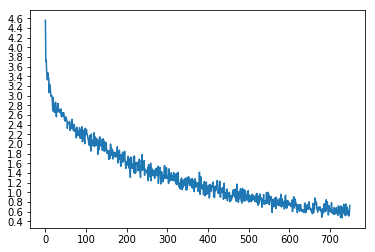

In [115]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words,
                               1, dropout_p=0.1)

if use_cuda:
    encoder1 = encoder1.cuda()
    attn_decoder1 = attn_decoder1.cuda()

trainEpochs(encoder1, attn_decoder1, 75000, print_every=5000)

In [119]:
evaluateRandomly(encoder1, attn_decoder1)

> il est un bon perdant .
= he is a good loser .
< he is a good good . . <EOS>

> il a plutot raison .
= he is quite right .
< he is old right . <EOS>

> j attends toujours ta reponse .
= i m still waiting for your answer .
< i m still waiting for your answer . <EOS>

> tu es tres solitaire .
= you re very lonely .
< you re very lonely . <EOS>

> je suis en retard sur le programme .
= i m behind schedule .
< i m behind schedule . <EOS>

> tu es connu .
= you re famous .
< you re famous . <EOS>

> c est une personne sympathique .
= he is a friendly person .
< he is a selfish person . <EOS>

> tu n es pas mort .
= you re not dead .
< you re not dead . <EOS>

> je suis assez occupe en realite .
= i m fairly busy actually .
< i m fairly busy . <EOS>

> je suis habituee a travailler dur .
= i am accustomed to working hard .
< i am accustomed to hard work . <EOS>



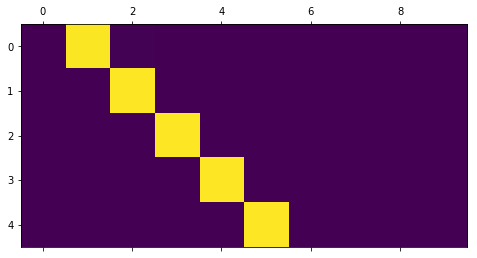

In [120]:
output_words, attentions = evaluate(
    encoder1, attn_decoder1, "je suis trop froid .")
plt.matshow(attentions.numpy())

In [121]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)

input = elle a cinq ans de moins que moi .
output = she s six years younger than me . <EOS>


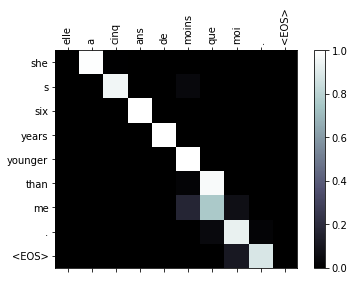

In [122]:
evaluateAndShowAttention("elle a cinq ans de moins que moi .")

input = elle est trop petit .
output = she s too dressed . <EOS>


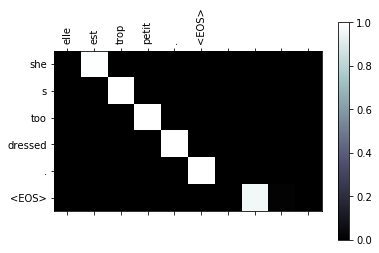

In [123]:
evaluateAndShowAttention("elle est trop petit .")

input = je ne crains pas de mourir .
output = i m not afraid of death . <EOS>


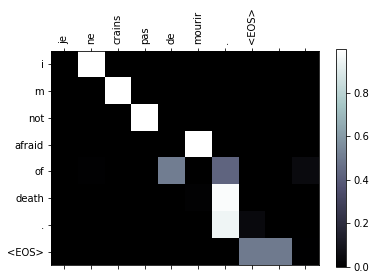

In [124]:
evaluateAndShowAttention("je ne crains pas de mourir .")

input = c est un jeune directeur plein de talent .
output = he s a lovely young man . <EOS>


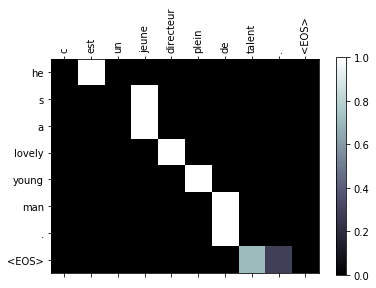

In [125]:
evaluateAndShowAttention("c est un jeune directeur plein de talent .")